# Matching

In [341]:
import gdown

gurl = 'https://drive.google.com/uc?id=1FHNOkV5PWmvyYno8bfBL13K7GlJV56V7'
gdown.download(gurl, 'match_20201125.csv')

Downloading...
From: https://drive.google.com/uc?id=1FHNOkV5PWmvyYno8bfBL13K7GlJV56V7
To: /home/painstudy/dl_pain/Preprocess/match_20201125.csv
100%|██████████| 1.16M/1.16M [00:01<00:00, 1.07MB/s]


'match_20201125.csv'

In [342]:
df_match = pd.read_csv('match_20201125.csv', sep=',')
df_match.drop(df_match.columns[[0,1,2,3,4]],axis=1, inplace=True)
df_match.drop_duplicates(['path','NRS_time'], inplace=True, ignore_index=True)
df_match

,oID,hid,gender,birthdate,NRS_time,Value,bed,opend_time,opid,path,set_value
0,21863852,51597829,F,1998-08-13,2019-04-08 12:00,6.0,1,2019-04-08 11:39,190408044,PACU1_1_190408_115004.vital,2
1,21863852,51597829,F,1998-08-13,2019-04-08 12:20,6.0,1,2019-04-08 11:39,190408044,PACU1_1_190408_115004.vital,2
2,21864256,52049619,F,1991-09-24,2019-04-08 20:40,7.0,1,2019-04-08 20:23,190408106,PACU1_1_190408_202459.vital,2
3,21884764,52067408,F,1972-10-25,2019-04-09 11:30,4.0,2,2019-04-09 10:52,190409012,PACU1_2_190409_110712.vital,1
4,21863954,47393105,F,1972-09-21,2019-04-09 12:00,6.0,3,2019-04-09 11:38,190409044,PACU1_3_190409_114333.vital,0
...,...,...,...,...,...,...,...,...,...,...,...
8385,31712645,47199853,M,1975-11-28,2020-10-30 21:20,6.0,1,2020-10-30 20:56,201030023,PACU1_1_201030_211816.vital,0
8386,31712645,47199853,M,1975-11-28,2020-10-30 21:45,6.0,1,2020-10-30 20:56,201030023,PACU1_1_201030_211816.vital,0
8387,31600302,51659688,M,1956-01-30,2020-10-31 13:20,10.0,3,2020-10-31 12:55,201031004,PACU1_3_201031_131135.vital,0
8388,31600302,51659688,M,1956-01-30,2020-10-31 13:30,9.0,3,2020-10-31 12:55,201031004,PACU1_3_201031_131135.vital,0


## Indexing NRS time data

In [343]:
from collections import Counter

#df_match = pickle.load(open('pacu_match20','rb'))

# 한 vital에 reported된 NRS 개수
dict_path = Counter(df_match['path'])
df_match['num'] = df_match['path'].apply(lambda x: dict_path[x])

df_match.sort_values('path', inplace=True, ignore_index=True)
df_match

,oID,hid,gender,birthdate,NRS_time,Value,bed,opend_time,opid,path,set_value,num
0,22215839,52100398,F,1977-06-10,2019-04-29 16:50,10.0,10,2019-04-29 16:25,190429095,PACU1_10_190429_163301.vital,2,1
1,22266054,51613923,F,1978-03-13,2019-04-30 12:05,4.0,10,2019-04-30 11:50,190430043,PACU1_10_190430_120158.vital,0,2
2,22266054,51613923,F,1978-03-13,2019-04-30 12:25,5.0,10,2019-04-30 11:50,190430043,PACU1_10_190430_120158.vital,0,2
3,22306556,49617698,M,1977-11-13,2019-05-02 12:05,3.0,10,2019-05-02 11:34,190502049,PACU1_10_190502_113856.vital,0,2
4,22306556,49617698,M,1977-11-13,2019-05-02 11:45,3.0,10,2019-05-02 11:34,190502049,PACU1_10_190502_113856.vital,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
8385,31717120,53599263,F,1983-12-22,2020-10-30 12:20,5.0,9,2020-10-30 12:01,201030092,PACU1_9_201030_120921.vital,0,2
8386,31714755,53904036,F,1967-08-12,2020-10-30 15:05,4.0,9,2020-10-30 14:25,201030105,PACU1_9_201030_143942.vital,0,2
8387,31714755,53904036,F,1967-08-12,2020-10-30 14:50,4.0,9,2020-10-30 14:25,201030105,PACU1_9_201030_143942.vital,0,2
8388,31712806,54275940,F,1972-12-03,2020-10-30 16:05,5.0,9,2020-10-30 15:40,201030055,PACU1_9_201030_154750.vital,0,2


In [344]:
order = 0
fileid = 'PACU1_10_190429_163301.vital'
df_match.loc[idx,'order'] = 0

for idx, row in tqdm(df_match.iterrows(), total=df_match.shape[0]):
    if row['path']==fileid:
        order += 1
    else:
        order = 1
        fileid = row['path']
        
    df_match.loc[idx,'order'] = order
    
df_match = df_match.astype({'order':'int'})
pickle.dump(df_match, open('pacu_match20','wb'))

100%|██████████| 8390/8390 [00:02<00:00, 3142.79it/s]


In [334]:
df_match[40:80]

,oID,hid,gender,birthdate,NRS_time,Value,bed,opend_time,opid,path,set_value,age,num,order
40,23006410,27576836,F,1980-01-04,2019-06-12 15:00:00,4.0,10,2019-06-12 14:35,190612077,PACU1_10_190612_144246.vital,0,44,2,2
41,23367697,51893729,M,1971-08-16,2019-07-04 13:05:00,8.0,10,2019-07-04 12:40,190704024,PACU1_10_190704_125218.vital,0,53,1,1
42,23471945,52448300,F,1957-06-16,2019-07-09 17:30:00,7.0,10,2019-07-09 17:00,190709115,PACU1_10_190709_172441.vital,1,67,1,1
43,23527775,12883284,F,1972-09-16,2019-07-10 10:55:00,5.0,10,2019-07-10 10:23,190710037,PACU1_10_190710_103525.vital,0,52,2,1
44,23527775,12883284,F,1972-09-16,2019-07-10 10:40:00,5.0,10,2019-07-10 10:23,190710037,PACU1_10_190710_103525.vital,0,52,2,2
45,23488772,50289125,F,1962-05-03,2019-07-10 16:30:00,5.0,10,2019-07-10 16:07,190710088,PACU1_10_190710_161700.vital,0,62,1,1
46,23550525,50550904,M,1938-06-08,2019-07-12 19:05:00,3.0,10,2019-07-12 18:36,190712111,PACU1_10_190712_185226.vital,0,86,1,1
47,23602778,48779656,F,1977-02-05,2019-07-15 12:20:00,8.0,10,2019-07-15 12:05,190715050,PACU1_10_190715_121338.vital,0,47,1,1
48,23617142,51809476,F,1948-10-27,2019-07-16 10:25:00,2.0,10,2019-07-16 9:59,190716023,PACU1_10_190716_100507.vital,0,76,2,1
49,23617142,51809476,F,1948-10-27,2019-07-16 10:45:00,2.0,10,2019-07-16 9:59,190716023,PACU1_10_190716_100507.vital,0,76,2,2


In [57]:
import os
import numpy as np

list_add = os.listdir('pacu_vital/pacu_ecg_pleth')

arr0 = [(ide in df_match['path'].tolist()) for ide in list_add]
np.sum(arr0)

5271

## 여러 trials for datatime type 맞추기
* pandas에서 .to_datetime하면 datetime.datetime과 다른 type의 timestamp 값으로 바뀌어버림...

In [117]:
t_rec = vitaldb.vital_recs(f'{vital_path}/{fileid}', track_names[0:1], return_datetime=True)[:,0]
df_map['NRS_time'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M'))

ex1 = datetime.datetime.strptime(df_map.loc[0,'NRS_time'], '%Y-%m-%d %H:%M')
ab1 = time.mktime(vf_time[0].timetuple())
row['NRS_time'].to_datetime64()
row['NRS_time'].to_pydatetime()
ab3 = row['NRS_time'].value / (10 ** 9)

ab2 = t_rec[0] + datetime.timedelta(seconds=179880/SRATE)
time.mktime(ab2.timetuple())

import pytz
row['NRS_time'].tz_localize(tz=pytz.UTC)

ex1-ab2.replace(tzinfo=None)

df_match['age'] = df_match['birthdate'].apply(lambda x: 2023-int(x[:4])+1)
pickle.dump(df_match, open('pacu_match20','wb'))

# Vital to numpy

In [ ]:
import pandas as pd
import datetime, time
import pickle, os, vitaldb
import numpy as np
from tqdm import tqdm


SRATE = 300
LEN_PER_NRS = 300
file_path = f'vital_to_np_pacu_{SRATE}Hz'
vital_path = 'pacu_vital/pacu_ecg_pleth'

if not os.path.exists(file_path):
    os.mkdir(file_path)

# dataframe of fileid & NRS reporting time
df_match = pickle.load(open('pacu_match20', 'rb'))
df_match['NRS_time'] = df_match['NRS_time'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M'))
df_match.reset_index(inplace=True, drop=True)

# tracks to extract / VENT_SET_TV -> VENT_INSP_TM, SET_INSP_TM
track_names = ["SNUADCW/ECG_II", "SNUADCW/PLETH"]
vital_list = os.listdir('pacu_vital/pacu_ecg_pleth')


nan_list, non_list = [], []
for idx, row in tqdm(df_match.iterrows(), total=df_match.shape[0]):
    fileid = row['path']
    order = row['order']
    filename = f'{file_path}/{fileid[:-6]}-{order}.npz'
    if os.path.isfile(filename):
        #print('already existing')
        continue
        
    if not fileid in vital_list:
        continue
    
    
    # get vital file and save as numpy
    vf = vitaldb.VitalFile(f'{vital_path}/{fileid}', track_names)
    vals = vf.to_numpy(track_names, interval=1/SRATE)
    
    if not np.sum(~np.isnan(vals[:])) > 0 or len(vals) == 0:
        nan_list.append(fileid)
        continue
        
    
    t_rec = vitaldb.vital_recs(f'{vital_path}/{fileid}', track_names[0:1], interval=1/SRATE, return_datetime=True)[:,0]
    for end_idx in range(len(t_rec)):
        if t_rec[end_idx].replace(tzinfo=None)>row['NRS_time']:
            break
            
    if end_idx == len(t_rec)-1 or end_idx <= 0:
        non_list.append(fileid)
        continue
            
    start_idx= end_idx - LEN_PER_NRS * SRATE
    start_idx = max(0,start_idx)
    
    ecg = vals[start_idx:end_idx,0]
    ppg = vals[start_idx:end_idx,1]
    
    if not np.sum(~np.isnan(ecg[:])) > 0 or len(ecg) == 0:
        non_list.append(fileid)
        continue
    
    np.savez(filename, ECG=ecg, PPG=ppg)
    
f = open(f'{file_path}/README.txt', 'w')
f.write(f'SRATE {SRATE}, LEN_PER_NRS {LEN_PER_NRS}\n')
f.write(f'no valid vital data: {nan_list}\n')
f.write(f'no vital data for NRS_time: {non_list}\n')
f.close()

  3%|▎         | 246/8390 [08:41<6:08:45,  2.72s/it]

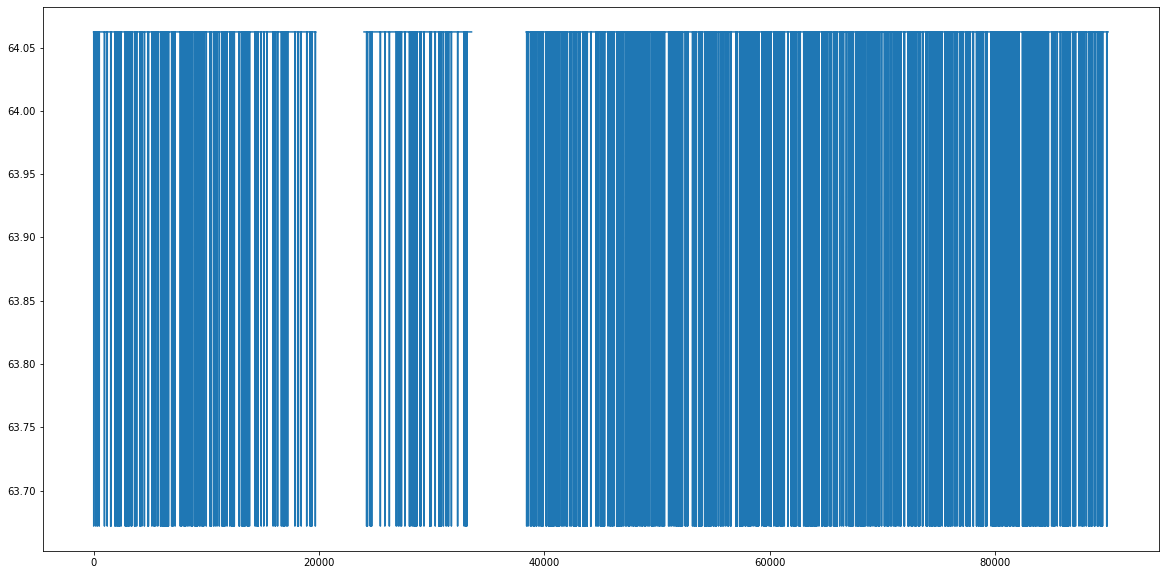

In [267]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(ppg)
#plt.plot(ecg[:6000])

# Preprocess

## Whole code (function)

In [ ]:
import itertools as it
import os
import pandas as pd
import numpy as np
import random
import vitaldb
from pyvital.pyvital import arr
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import time, datetime
import neurokit2 as nk
from tqdm import tqdm

SRATE = 300
LEN_INPUT = 20
STRIDE = 10
LEN_NRS = 120


# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)

def lowess(y, f=0.2):
    x = np.arange(0, len(y))
    return sm.nonparametric.lowess(y, x, frac=f, it=0)[:, 1].T
## 60초짜리 inputp에 대해 f 그려보기


def ECG_filter(seg, method, srate):
    if method == '3rd-bandpass':
        import scipy.signal
        sos = scipy.signal.butter(3, [1,47], 'bandpass', output='sos', fs=srate)
        return scipy.signal.sosfilt(sos, seg)
    # lowess랑 수학적으로 동일한데 더 빠름 - 대신 계수 체크 필요
    elif method == 'savgol':
        import scipy.signal
        return seg - scipy.signal.savgol_filter(seg, 1151, 3)
    
    elif method == 'lowess':
        import statsmodels.api as sm
        x = np.arange(0, len(seg))
        return seg - sm.nonparametric.lowess(seg, x, frac=0.2, it=0)[:, 1].T

    else:
        print('not a valid filter')
        return seg

    
def PPG_filter(seg, method, srate):
    if method == 'bandpass':
        import scipy.signal
        sos = scipy.signal.butter(5, [1,40], 'bandpass', output='sos', fs=srate)
        return scipy.signal.sosfilt(sos, seg)
    
    elif method == 'lowess':
        import statsmodels.api as sm
        x = np.arange(0, len(seg))
        return seg - sm.nonparametric.lowess(seg, x, frac=0.2, it=0)[:, 1].T
    
    else:
        print('not a valid filter')
        return seg
    
    
def quality_assessment(seg_ppg, seg_ecg, corr_thres):
    # peak detection
    try:
        min_peak, ppg_peak = arr.detect_peaks(pd.DataFrame(seg_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)
        signals, info = nk.ecg_peaks(pd.DataFrame(seg_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), sampling_rate = SRATE)
        ecg_peak = info["ECG_R_Peaks"]

    except Exception as e:
        #print('error of', e)
        return False
        
    if len(ppg_peak)==0 or len(ecg_peak)==0:
        #print('no peak')
        return False


    # segment 내의 ppg, ecg peak idx
    idx_ppg_peak = ppg_peak
    idx_ecg_peak = ecg_peak


    # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
    # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
    if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
        #print(' too less peaks', end='')
        return False
    

    # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1 (noise면 True)
    bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
    bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]


    #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
    for k in range(len(bool_noise_ppg)):
        if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
            bool_noise_ppg[k] = True
    for k in range(len(bool_noise_ecg)):
        if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
            bool_noise_ecg[k] = True


    # 2.2 모양 이상한 noise
    # wave interval into same length(2s(200))
    len_wave = 2*SRATE
    norm_seg_ppg, norm_seg_ecg = [], []

    for k in range(len(bool_noise_ppg)):
        len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]
        # peak 사이 wave를 모두 같은 길이로 변환
        norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])

    for k in range(len(bool_noise_ecg)):
        len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]
        # peak 사이 wave를 모두 같은 길이로 변환
        norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])

    # wave interval 사이 correlation 계산 - PPG
    corr_ppg = []
    mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
    mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
    norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
    for k in range(len(bool_noise_ppg)):
        corr = np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1]
        corr_ppg.append(corr)
    noise_ppg_perc = np.mean(bool_noise_ppg | (np.array(corr_ppg) < corr_thres))


    # wave interval 사이 correlation 계산 - ECG   
    corr_ecg = []
    mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
    mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
    norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
    for k in range(len(bool_noise_ecg)):
        corr = np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1]
        corr_ecg.append(corr)
    noise_ecg_perc = np.mean(bool_noise_ecg | (np.array(corr_ecg) < corr_thres))                          

    
    # segment의 noise 비율 정보를 return
    return [noise_ppg_perc, noise_ecg_perc]


def preprocess(file_path, SRATE, ECG_FILT, PPG_FILT, CORR_THRES):
    ### Preprocess of input : Denosing -> Quality Assessment
    ### stores the result of preprocess in dataframe
    # path for cache
    if not os.path.exists('./cache'):
        os.mkdir('./cache')     
    if not os.path.exists('./cache/preprocess'):
        os.mkdir('./cache/preprocess')

    hyper_path = f'PACU_SRATE{SRATE}_LEN{LEN_INPUT}_LEN_NRS{LEN_NRS}_STR{STRIDE}_PPG-{PPG_FILT}_ECG-{ECG_FILT}'
    input_path = f"../DL_model/dataset/{hyper_path}/"
    if not os.path.exists('../DL_model/dataset'):
        os.mkdir('../DL_model/dataset')
    if not os.path.exists(input_path[:-1]):
        os.mkdir(input_path[:-1])  
        

    # dataframe to save preprocessing info
    n_aug = int((LEN_NRS-LEN_INPUT)/STRIDE) + 1
    column_list = ['caseid'] + [f'{i+1}' for i in np.arange(n_aug)] + ['age', 'gender']
    df_preprocess = pd.DataFrame(columns = column_list)

    # df_preprocess에 demographs(age, gender) 추가
    df_demograph = pickle.load(open('pacu_match20','rb'))

    
    # set variables
    caseids = os.listdir(file_path)
    f_num = 0
    initial, interval = f_num, len(caseids)
    
    # variables
    non_lis, low_mbp = [], []
    x, x_rftn, y, c = [], [], [], []
    age, gender, y_mbp = [], [], []
    nan_hr, nan_mbp, nan_rftn = 0, 0, 0

    start = time.time()
    pbar = tqdm(caseids[initial:initial+interval])
    for caseid in pbar:
        caseid = caseid[:-4]   # '123.npz' -> '123'
        f_num += 1

        # vital data 불러오기
        try:
            vals = np.load(f'{file_path}/{caseid}.npz')
            
        except Exception as e:
            continue


        ### before intubation event (-120 ~ -60sec) preprocessing  
        #n_aug = int((LEN_NRS-LEN_INPUT)/STRIDE) + 1
        segs_ppg = vals['nPPG'][-LEN_NRS*SRATE:]
        segs_ecg = vals['nECG'][-LEN_NRS*SRATE:]
        for i in range(n_aug):
            # vital data
            seg_ppg = segs_ppg[i*STRIDE*SRATE:i*STRIDE*SRATE+LEN_INPUT*SRATE]
            seg_ecg = segs_ecg[i*STRIDE*SRATE:i*STRIDE*SRATE+LEN_INPUT*SRATE]
            
            if len(seg_ppg) == 0 or len(seg_ecg) == 0:
                #print('not valid ecg, ppg', end='...')
                continue

            seg_ppg = [np.nan if ele <=-200 else ele for ele in seg_ppg]
            seg_ecg = [np.nan if ele <=-4 else ele for ele in seg_ecg]

            #dataframe에 새로운 행 만들기
            df_preprocess.loc[f_num-1,'caseid'] = caseid
            
            row_demo = df_demograph[df_demograph['caseid']==int(caseid)]
            df_preprocess.loc[f_num-1, 'age'] = row_demo['age'].values[0]
            df_preprocess.loc[f_num-1, 'gender'] = row_demo['gender'].values[0]

            
            ## 1. 결측치 제거 ##
            nan_ppg_perc = np.mean(np.isnan(seg_ppg))
            nan_ecg_perc = np.mean(np.isnan(seg_ecg))

            # segment의 결측치 비율 정보
            nan_info = [nan_ppg_perc, nan_ecg_perc]

            # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
            if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05:
                #print(' too much missing data', end='...')
                df_preprocess.loc[f_num-1,f'{i+1}'] = (False, nan_info, [-1, -1])
                continue


            ## 2. Denosing ##
            # ECG : 1-40Hz bandpass filter / PPG : loess filter
            seg_ecg = ECG_filter(pd.DataFrame(seg_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), method=ECG_FILT, srate=SRATE)
            seg_ppg = PPG_filter(pd.DataFrame(seg_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), method=PPG_FILT, srate=SRATE)


            ## 3. Quality Assessment ## 
            # segment의 noise 비율 정보
            noise_info = quality_assessment(seg_ppg, seg_ecg, CORR_THRES) 
            
            # Fail the preprocess
            if not noise_info:
                df_preprocess.loc[f_num-1,f'{i+1}'] = (False, nan_info, [-2, -2])
                continue


            # segment를 input으로 써도 되는지
            bool_pass = [True if noise_info[0] < 0.1 and noise_info[1] < 0.1 else False]


            # 이 segment의 정보를 dataframe에 저장 - (전처리 성공여부, 전처리 nan 비율, 전처리 noise 비율, 통증 점수)
            df_preprocess.loc[f_num-1,f'{i+1}'] = (bool_pass[0], nan_info, noise_info)
            #print(f'preprocessing done...{bool_pass[0]}', end='')
            
            
            if bool_pass[0]:
                # z-score normalization
                ppg_input = stats.zscore(seg_ppg)
                ecg_input = stats.zscore(seg_ecg)


                age.append(int(row_demo['age'].values[0]))
                if row_demo['gender'].values[0]=='F':
                    gender.append(1)
                else:
                    gender.append(0)
                x.append([ppg_input, ecg_input])
                y.append(del_hr)
                c.append(caseid)

    print(f'\ndumping cache of df_preprocess {f_num}/{len(caseids)}', end='...')


    df_preprocess.reset_index(drop=True, inplace=True)    
    pickle.dump(df_preprocess, open(f'cache/preprocess/df_preprocess_{hyper_path}', 'wb'))
    print('dumping success')
    
    # dataset
    x = np.array(x, np.float32)
    y = np.array(y, np.float32)
    c = np.array(c)
    age = np.array(age, int)
    gender = np.array(gender, int)

    # 알맞게 input 변환
    x = np.transpose(x, [0,2,1])

    print('after concatenate + transpose')
    print('x shape:', x.shape)
    print('y shape:', y.shape)
    print('caseid num: ', len(c))
    print(f'input path: {input_path}\n')
    print(datetime.datetime.now())


    # train, test set
    caseids = list(np.unique(c))
    if len(caseids) != len(c):
        print('overlapped caseid exists')
    random.shuffle(caseids)

    ntest = max(1, int(len(caseids) * 0.1))
    ntrain = len(caseids) - ntest

    caseid_train = caseids[:ntrain]
    caseid_test = caseids[ntrain:]

    print('전체 caseid 수: {}'.format(len(caseids)))
    print('train caseid 수: {}, test caseid 수: {}'.format(len(caseid_train), len(caseid_test)))

    pickle.dump(caseid_train, open(f'../DL_model/pd/caseid_train_{hyper_path}','wb'))
    pickle.dump(caseid_test, open(f'../DL_model/pd/caseid_test_{hyper_path}','wb'))

    train_mask = np.isin(c, caseid_train)
    test_mask = np.isin(c, caseid_test)

    x_train = x[train_mask]
    x_test = x[test_mask]
    y_train = y[train_mask]
    y_test = y[test_mask]
    c_train = c[train_mask]
    c_test = c[test_mask]

    age_train = age[train_mask]
    age_test = age[test_mask]
    gender_train = gender[train_mask]
    gender_test = gender[test_mask]


    # 저장하기
    print('saving...', end='', flush=True)
    np.savez_compressed(input_path+'x_train.npz', x_train)
    np.savez_compressed(input_path+'x_test.npz', x_test)
    np.savez_compressed(input_path+'rftn_train.npz', rftn_train)
    np.savez_compressed(input_path+'rftn_test.npz', rftn_test)
    np.savez_compressed(input_path+'y_train.npz', y_train)
    np.savez_compressed(input_path+'y_test.npz', y_test)
    np.savez_compressed(input_path+'mbp_train.npz', mbp_train)
    np.savez_compressed(input_path+'mbp_test.npz', mbp_test)
    np.savez_compressed(input_path+'c_train.npz', c_train)
    np.savez_compressed(input_path+'c_test.npz', c_test)

    np.savez_compressed(input_path+'age_train.npz', age_train)
    np.savez_compressed(input_path+'age_test.npz', age_test)
    np.savez_compressed(input_path+'gender_train.npz', gender_train)
    np.savez_compressed(input_path+'gender_test.npz', gender_test)

    print('done', flush=True)
    print('\nsize of training set:', len(x_train))
    print('size of test set:', len(x_test)) 
    print(f'num of hr value nan : {nan_hr}')
    print(f'num of mbp value nan : {nan_mbp}')
    print(f'num of rftn value nan : {nan_rftn}')
    print(f'num of low baseline bp : {len(low_mbp)}')

    print(datetime.datetime.now())
    print(f'total elapsed time for preprocess: {time.time() - start:.2f}s\n')


    # 전처리 통과 비율 출력
    nl_pass, l_pass = [], []
    for idx, row in df_preprocess.iterrows():
        for i in range(n_aug):
            nl_pass.append(row[f'{i+1}'][0])
        #l_pass.append(row['2'][0])

    print(f'전처리 성공 비율 : intubation 직전 {np.mean(nl_pass)*100:.2f}%') #, intubation 직후 {np.mean(l_pass)*100:.2f}%')
    print(datetime.datetime.now())

In [ ]:
SRATE = 300
ECG_FILT = '3rd-bandpass'
PPG_FILT = 'lowess'
CORR_THRES = 0.9 # cutoff
LEN_INPUT = 30 # length of the input
STRIDE = 1
LEN_PER_PRE = 30 # before intubation
LEN_PER_POST = 30

file_path = f'vital_to_np_pd_{SRATE}Hz'

preprocess(file_path, SRATE, ECG_FILT, PPG_FILT, CORR_THRES)

## Codes for cell running

In [1]:
import itertools as it
import os
import pandas as pd
import numpy as np
import random
import vitaldb
from pyvital.pyvital import arr
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import time, datetime
import neurokit2 as nk
from tqdm import tqdm

SRATE = 300
LEN_INPUT = 120
STRIDE = 0
LEN_NRS = 120


# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)

def lowess(y, f=0.2):
    x = np.arange(0, len(y))
    return sm.nonparametric.lowess(y, x, frac=f, it=0)[:, 1].T
## 60초짜리 inputp에 대해 f 그려보기


def ECG_filter(seg, method, srate):
    if method == '3rd-bandpass':
        import scipy.signal
        sos = scipy.signal.butter(3, [1,47], 'bandpass', output='sos', fs=srate)
        return scipy.signal.sosfilt(sos, seg)
    # lowess랑 수학적으로 동일한데 더 빠름 - 대신 계수 체크 필요
    elif method == 'savgol':
        import scipy.signal
        return seg - scipy.signal.savgol_filter(seg, 1151, 3)
    
    elif method == 'lowess':
        import statsmodels.api as sm
        x = np.arange(0, len(seg))
        return seg - sm.nonparametric.lowess(seg, x, frac=0.2, it=0)[:, 1].T

    else:
        print('not a valid filter')
        return seg

    
def PPG_filter(seg, method, srate):
    if method == 'bandpass':
        import scipy.signal
        sos = scipy.signal.butter(5, [1,40], 'bandpass', output='sos', fs=srate)
        return scipy.signal.sosfilt(sos, seg)
    
    elif method == 'lowess':
        import statsmodels.api as sm
        x = np.arange(0, len(seg))
        return seg - sm.nonparametric.lowess(seg, x, frac=0.2, it=0)[:, 1].T
    
    else:
        print('not a valid filter')
        return seg
    
    
def quality_assessment(seg_ppg, seg_ecg, corr_thres):
    # peak detection
    try:
        min_peak, ppg_peak = arr.detect_peaks(pd.DataFrame(seg_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)
        signals, info = nk.ecg_peaks(pd.DataFrame(seg_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), sampling_rate = SRATE)
        ecg_peak = info["ECG_R_Peaks"]

    except Exception as e:
        #print('error of', e)
        return False
        
    if len(ppg_peak)==0 or len(ecg_peak)==0:
        #print('no peak')
        return False


    # segment 내의 ppg, ecg peak idx
    idx_ppg_peak = ppg_peak
    idx_ecg_peak = ecg_peak


    # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
    # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
    if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
        #print(' too less peaks', end='')
        return False
    

    # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1 (noise면 True)
    bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
    bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]


    #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
    for k in range(len(bool_noise_ppg)):
        if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
            bool_noise_ppg[k] = True
    for k in range(len(bool_noise_ecg)):
        if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
            bool_noise_ecg[k] = True


    # 2.2 모양 이상한 noise
    # wave interval into same length(2s(200))
    len_wave = 2*SRATE
    norm_seg_ppg, norm_seg_ecg = [], []

    for k in range(len(bool_noise_ppg)):
        len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]
        # peak 사이 wave를 모두 같은 길이로 변환
        norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])

    for k in range(len(bool_noise_ecg)):
        len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]
        # peak 사이 wave를 모두 같은 길이로 변환
        norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])

    # wave interval 사이 correlation 계산 - PPG
    corr_ppg = []
    mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
    mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
    norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
    for k in range(len(bool_noise_ppg)):
        corr = np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1]
        corr_ppg.append(corr)
    noise_ppg_perc = np.mean(bool_noise_ppg | (np.array(corr_ppg) < corr_thres))


    # wave interval 사이 correlation 계산 - ECG   
    corr_ecg = []
    mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
    mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
    norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
    for k in range(len(bool_noise_ecg)):
        corr = np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1]
        corr_ecg.append(corr)
    noise_ecg_perc = np.mean(bool_noise_ecg | (np.array(corr_ecg) < corr_thres))                          

    
    # segment의 noise 비율 정보를 return
    return [noise_ppg_perc, noise_ecg_perc]


In [391]:
df_demograph

,oID,hid,gender,birthdate,NRS_time,Value,bed,opend_time,opid,path,set_value,num,order,age
0,22215839,52100398,F,1977-06-10,2019-04-29 16:50:00,10.0,10,2019-04-29 16:25,190429095,PACU1_10_190429_163301.vital,2,1,1,47
1,22266054,51613923,F,1978-03-13,2019-04-30 12:05:00,4.0,10,2019-04-30 11:50,190430043,PACU1_10_190430_120158.vital,0,2,1,46
2,22266054,51613923,F,1978-03-13,2019-04-30 12:25:00,5.0,10,2019-04-30 11:50,190430043,PACU1_10_190430_120158.vital,0,2,2,46
3,22306556,49617698,M,1977-11-13,2019-05-02 12:05:00,3.0,10,2019-05-02 11:34,190502049,PACU1_10_190502_113856.vital,0,2,1,47
4,22306556,49617698,M,1977-11-13,2019-05-02 11:45:00,3.0,10,2019-05-02 11:34,190502049,PACU1_10_190502_113856.vital,0,2,2,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8385,31717120,53599263,F,1983-12-22,2020-10-30 12:20:00,5.0,9,2020-10-30 12:01,201030092,PACU1_9_201030_120921.vital,0,2,2,41
8386,31714755,53904036,F,1967-08-12,2020-10-30 15:05:00,4.0,9,2020-10-30 14:25,201030105,PACU1_9_201030_143942.vital,0,2,1,57
8387,31714755,53904036,F,1967-08-12,2020-10-30 14:50:00,4.0,9,2020-10-30 14:25,201030105,PACU1_9_201030_143942.vital,0,2,2,57
8388,31712806,54275940,F,1972-12-03,2020-10-30 16:05:00,5.0,9,2020-10-30 15:40,201030055,PACU1_9_201030_154750.vital,0,2,1,52


In [4]:
file_path = f'vital_to_np_pacu_{SRATE}Hz'
SRATE = 300    
ECG_FILT = '3rd-bandpass'
PPG_FILT = 'lowess'
CORR_THRES = 0.9 # cutoff

### Preprocess of input : Denosing -> Quality Assessment
### stores the result of preprocess in dataframe
# path for cache
if not os.path.exists('./cache'):
    os.mkdir('./cache')     
if not os.path.exists('./cache/preprocess'):
    os.mkdir('./cache/preprocess')

    
hyper_path = f'PACU_SRATE{SRATE}_LEN{LEN_INPUT}_LEN_NRS{LEN_NRS}_STR{STRIDE}_PPG-{PPG_FILT}_ECG-{ECG_FILT}'
input_path = f"../DL_model/dataset/{hyper_path}/"
if not os.path.exists('../DL_model/dataset'):
    os.mkdir('../DL_model/dataset')
if not os.path.exists(input_path[:-1]):
    os.mkdir(input_path[:-1])  


# dataframe to save preprocessing info
n_aug = int((LEN_NRS-LEN_INPUT)/STRIDE) + 1 if STRIDE != 0 else 1
column_list = ['fileid'] + [f'{i+1}' for i in np.arange(n_aug)] + ['age', 'gender']
df_preprocess = pd.DataFrame(columns = column_list)

# df_preprocess에 demographs(age, gender) 추가
df_demograph = pickle.load(open('pacu_match20','rb'))


# set variables
fileids = os.listdir(file_path)
f_num = 0
initial, interval = f_num, len(fileids)

# variables
non_lis, low_mbp = [], []
x, y, c, f = [], [], [], []
age, gender, y_mbp = [], [], []
nan_hr, nan_mbp, nan_rftn = 0, 0, 0

start = time.time()
#pbar = tqdm(fileids[initial:initial+interval])
#for fileid in pbar:
for idx, row in tqdm(df_demograph.iterrows(), total=df_demograph.shape[0]):
    fileid = row['path'][:-6] # '123.vital' -> '123'
    # 각 vital file에 대해 첫 시점의 NRS 데이터만 취급
    if fileid in df_preprocess['fileid'].tolist() or row['order']!=1:
        continue

    # vital data 불러오기
    try:
        vals = np.load(f'{file_path}/{fileid}-1.npz')
    except Exception as e:
        continue


    ### NRS reporting 시점에 해당하는 vital data  
    segs_ppg = np.full((LEN_NRS*SRATE,), np.nan)
    segs = vals['PPG'][-LEN_NRS*SRATE:]
    segs_ppg[-len(segs):] = segs
    
    segs_ecg = np.full((LEN_NRS*SRATE,), np.nan)
    segs = vals['ECG'][-LEN_NRS*SRATE:]
    segs_ecg[-len(segs):] = segs
    
    
    #dataframe에 새로운 행 만들기
    df_preprocess.loc[idx,'fileid'] = fileid
    df_preprocess.loc[idx, 'age'] = row['age']
    df_preprocess.loc[idx, 'gender'] = row['gender']
    df_preprocess.loc[idx, 'NRS'] = int(row['Value'])
    
    
    for i in range(n_aug):
        # segment의 vital data
        seg_ppg = segs_ppg[i*STRIDE*SRATE:i*STRIDE*SRATE+LEN_INPUT*SRATE]
        seg_ecg = segs_ecg[i*STRIDE*SRATE:i*STRIDE*SRATE+LEN_INPUT*SRATE]

        if len(seg_ppg) == 0 or len(seg_ecg) == 0:
            #print('not valid ecg, ppg', end='...')
            continue

        # outlier 값은 nan으로 처리
        seg_ppg = [np.nan if ele <=-200 else ele for ele in seg_ppg]
        seg_ecg = [np.nan if ele <=-4 else ele for ele in seg_ecg]


        ## 1. 결측치 제거 ##
        nan_ppg_perc = np.mean(np.isnan(seg_ppg))
        nan_ecg_perc = np.mean(np.isnan(seg_ecg))

        # segment의 결측치 비율 정보
        nan_info = [nan_ppg_perc, nan_ecg_perc]

        # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
        if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05:
            #print(' too much missing data', end='...')
            df_preprocess.at[idx,f'{i+1}'] = (False, nan_info, [-1, -1])
            continue


        ## 2. Denosing ##
        # ECG : 1-40Hz bandpass filter / PPG : loess filter
        seg_ecg = ECG_filter(pd.DataFrame(seg_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), method=ECG_FILT, srate=SRATE)
        seg_ppg = PPG_filter(pd.DataFrame(seg_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), method=PPG_FILT, srate=SRATE)


        ## 3. Quality Assessment ## 
        # segment의 noise 비율 정보
        noise_info = quality_assessment(seg_ppg, seg_ecg, CORR_THRES) 

        # Fail the preprocess
        if not noise_info:
            df_preprocess.at[idx,f'{i+1}'] = (False, nan_info, [-2, -2])
            continue

        # segment의 전처리 성공 여부
        bool_pass = True if noise_info[0] < 0.1 and noise_info[1] < 0.1 else False

        # 이 segment의 정보를 dataframe에 저장 - (전처리 성공여부, 전처리 nan 비율, 전처리 noise 비율, 통증 점수)
        df_preprocess.at[idx,f'{i+1}'] = (bool_pass, nan_info, noise_info)

        
        # 전처리 통과한 segment로 input 만들기
        if bool_pass:
            # z-score normalization
            ppg_input = stats.zscore(seg_ppg)
            ecg_input = stats.zscore(seg_ecg)

            age.append(int(row['age']))
            if row['gender']=='F':
                gender.append(1)
            else:
                gender.append(0)
            x.append([ppg_input, ecg_input])
            y.append(int(row['Value']))
            c.append(row['hid'])
            f.append(fileid)
            
            
    if idx % 500 == 0 and idx != 0:
        pickle.dump(df_preprocess, open(f'cache/preprocess/df_preprocess_{hyper_path}', 'wb'))


100%|██████████| 8390/8390 [8:32:19<00:00,  3.66s/it]   


In [6]:
print(f'num of segments: {len(c)}, num of hid: {len(np.unique(c))}, num of fileid: {len(np.unique(f))}')


# dataset
x = np.array(x, np.float32)
y = np.array(y, np.float32)
c = np.array(c)
age = np.array(age, int)
gender = np.array(gender, int)

# 알맞게 input 변환
x = np.transpose(x, [0,2,1])

print('after concatenate + transpose')
print('x shape:', x.shape)
print('y shape:', y.shape)
print('caseid num: ', len(c))
print(f'input path: {input_path}\n')
print(datetime.datetime.now())


# train, test set
caseids = list(np.unique(c))
if len(caseids) != len(c):
    print('overlapped caseid exists')
random.shuffle(caseids)

ntest = max(1, int(len(caseids) * 0.1))
ntrain = len(caseids) - ntest

caseid_train = caseids[:ntrain]
caseid_test = caseids[ntrain:]

print('전체 caseid 수: {}'.format(len(caseids)))
print('train caseid 수: {}, test caseid 수: {}'.format(len(caseid_train), len(caseid_test)))

pickle.dump(caseid_train, open(f'../DL_model/pacu/caseid_train_{hyper_path}','wb'))
pickle.dump(caseid_test, open(f'../DL_model/pacu/caseid_test_{hyper_path}','wb'))

train_mask = np.isin(c, caseid_train)
test_mask = np.isin(c, caseid_test)

x_train = x[train_mask]
x_test = x[test_mask]
y_train = y[train_mask]
y_test = y[test_mask]
c_train = c[train_mask]
c_test = c[test_mask]

age_train = age[train_mask]
age_test = age[test_mask]
gender_train = gender[train_mask]
gender_test = gender[test_mask]


# 저장하기
print('saving...', end='', flush=True)
np.savez_compressed(input_path+'x_train.npz', x_train)
np.savez_compressed(input_path+'x_test.npz', x_test)
np.savez_compressed(input_path+'y_train.npz', y_train)
np.savez_compressed(input_path+'y_test.npz', y_test)
np.savez_compressed(input_path+'c_train.npz', c_train)
np.savez_compressed(input_path+'c_test.npz', c_test)

np.savez_compressed(input_path+'age_train.npz', age_train)
np.savez_compressed(input_path+'age_test.npz', age_test)
np.savez_compressed(input_path+'gender_train.npz', gender_train)
np.savez_compressed(input_path+'gender_test.npz', gender_test)

print('done', flush=True)
print('\nsize of training set:', len(x_train))
print('size of test set:', len(x_test)) 
print(datetime.datetime.now())


# 전처리 통과 비율 출력
nl_pass, l_pass = [], []
for idx, row in df_preprocess.iterrows():
    for i in range(n_aug):
        nl_pass.append(row[f'{i+1}'][0])
    #l_pass.append(row['2'][0])

print(f'전처리 성공 비율 : {np.mean(nl_pass)*100:.2f}%') #, intubation 직후 {np.mean(l_pass)*100:.2f}%')

num of segments: 2215, num of hid: 2172, num of fileid: 2215
after concatenate + transpose
x shape: (2215, 36000, 2)
y shape: (2215,)
caseid num:  2215
input path: ../DL_model/dataset/PACU_SRATE300_LEN120_LEN_NRS120_STR0_PPG-lowess_ECG-3rd-bandpass/

2023-01-26 02:46:29.553151
overlapped caseid exists
전체 caseid 수: 2172
train caseid 수: 1955, test caseid 수: 217
saving...done

size of training set: 1995
size of test set: 220
2023-01-26 02:47:01.680398
전처리 성공 비율 : 42.21%


In [411]:
np.array(x).shape

(28957, 2, 6000)

 ...]

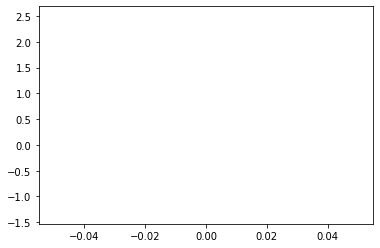

In [400]:
plt.plot(np.array(x)[:,0])

In [362]:
df_preprocess

,fileid,1,2,3,4,5,6,7,8,9,10,11,age,gender
0,PACU1_10_190429_163301,"(False, [0.0003333333333333333, 0.000333333333...","(False, [0.0, 0.0], [1.0, 0.0])","(False, [0.0, 0.0], [-2, -2])","(False, [0.0, 0.0], [-2, -2])","(False, [0.0, 0.0], [0.5909090909090909, 0.0])","(False, [0.0, 0.0], [1.0, 0.0])","(False, [0.0, 0.0], [-2, -2])","(False, [0.0, 0.0], [-2, -2])","(False, [0.0, 0.0], [-2, -2])","(False, [0.0, 0.0], [0.7727272727272727, 0.185...","(False, [0.0, 0.0], [-2, -2])",47,F
1,PACU1_10_190430_120158,"(False, [0.0, 0.0], [0.0, 0.39285714285714285])","(False, [0.0, 0.0], [0.0, 0.14814814814814814])","(True, [0.0, 0.0], [0.0, 0.03571428571428571])","(False, [0.0, 0.0], [0.0, 0.10714285714285714])","(False, [0.0, 0.0], [0.0, 0.42857142857142855])","(False, [0.0, 0.0], [0.0, 0.6551724137931034])","(False, [0.0, 0.0], [0.0, 0.4642857142857143])","(False, [0.0, 0.0], [0.0, 0.2857142857142857])","(False, [0.0, 0.0], [0.0, 0.17857142857142858])","(False, [0.0, 0.0], [0.0, 0.14285714285714285])","(False, [0.0, 0.0], [0.0, 0.10714285714285714])",46,F
2,PACU1_10_190430_120158,"(False, [0.0, 0.0], [0.0, 0.39285714285714285])","(False, [0.0, 0.0], [0.0, 0.14814814814814814])","(True, [0.0, 0.0], [0.0, 0.03571428571428571])","(False, [0.0, 0.0], [0.0, 0.10714285714285714])","(False, [0.0, 0.0], [0.0, 0.42857142857142855])","(False, [0.0, 0.0], [0.0, 0.6551724137931034])","(False, [0.0, 0.0], [0.0, 0.4642857142857143])","(False, [0.0, 0.0], [0.0, 0.2857142857142857])","(False, [0.0, 0.0], [0.0, 0.17857142857142858])","(False, [0.0, 0.0], [0.0, 0.14285714285714285])","(False, [0.0, 0.0], [0.0, 0.10714285714285714])",46,F
3,PACU1_10_190502_113856,"(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.043478260869565216, 0.0])","(False, [0.0, 0.0], [0.13636363636363635, 0.0])",47,M
4,PACU1_10_190502_113856,"(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.043478260869565216, 0.0])","(False, [0.0, 0.0], [0.13636363636363635, 0.0])",47,M
5,PACU1_10_190502_125645,"(True, [0.0, 0.0], [0.0, 0.0])","(False, [0.3335, 0.3335], [-1, -1])","(False, [0.722, 0.722], [-1, -1])","(False, [0.3885, 0.3885], [-1, -1])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])",33,M
6,PACU1_10_190502_125645,"(True, [0.0, 0.0], [0.0, 0.0])","(False, [0.3335, 0.3335], [-1, -1])","(False, [0.722, 0.722], [-1, -1])","(False, [0.3885, 0.3885], [-1, -1])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])",33,M
7,PACU1_10_190502_161852,"(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.08, 0.0])","(True, [0.0, 0.0], [0.07692307692307693, 0.0])","(True, [0.0, 0.0], [0.08, 0.0])","(True, [0.0, 0.0], [0.038461538461538464, 0.0])","(True, [0.0, 0.0], [0.07407407407407407, 0.0])","(False, [0.0, 0.0], [0.11538461538461539, 0.0])",63,M
8,PACU1_10_190502_161852,"(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.0, 0.0])","(True, [0.0, 0.0], [0.08, 0.0])","(True, [0.

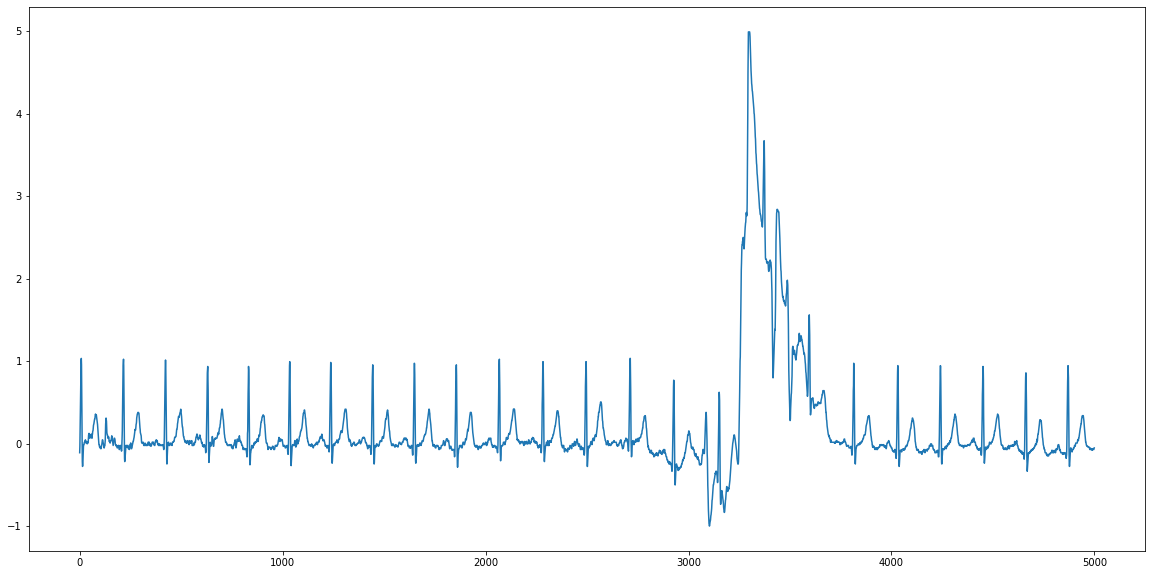

In [381]:
plt.figure(figsize=(20,10))
plt.plot(segs_ecg[25000:30000])

/tmp/ipykernel_2752493/2243455647.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  plt.plot(np.array(x)[40,1])


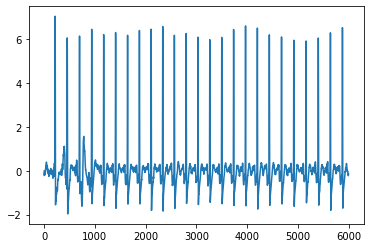

In [301]:
plt.plot(np.array(x)[40,1])

In [291]:
row['gender'].values

AttributeError: 'str' object has no attribute 'values'

In [286]:
row_demo

,oID,hid,gender,birthdate,NRS_time,Value,bed,opend_time,opid,path,set_value,age
3941,27488369,53069801,F,1968-12-15,2020-02-21 10:50:00,3.0,3,2020-02-21 10:34,200221109,PACU1_3_200221_104707.vital,1,56
3944,27488369,53069801,F,1968-12-15,2020-02-21 11:20:00,7.0,3,2020-02-21 10:34,200221109,PACU1_3_200221_104707.vital,1,56
